### ANALISIS SENTIMEN ULASAN LGBT METODE SVM

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Import Data
data = pd.read_excel('preprocessing_LGBT.xlsx', usecols=['Stemming', 'Label'])
data

,Label,Stemming
0,negatif,pelangi bagus lgbt hancur citra pelangi jelek
1,negatif,ngetrend lgbt ya maaf kaum sodom kisah nya nab...
2,positif,meta lindung komunitas lgbt berani posting law...
3,negatif,bilang lgbt sakit bilang homophobia sakit thou...
4,negatif,orang bersih negeri lgbt lumpuh gagu buta amp ...
...,...,...
999,negatif,orang sok open minded boleh pasang lgbt bebas ...
1000,negatif,kadang terfikir zina lgbt normalisasi benda ha...
1001,negatif,sumpah ya capek banget kalo jalan cewek tuh aj...
1002,negatif,kaum lgbt sila hengkang ikut erti


In [ ]:
# Menampilkan Jumlah Label Sentimen
temp = data.groupby('Label').count()['Stemming'].reset_index().sort_values(by='Stemming',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Label,Stemming
0,negatif,678
1,positif,326


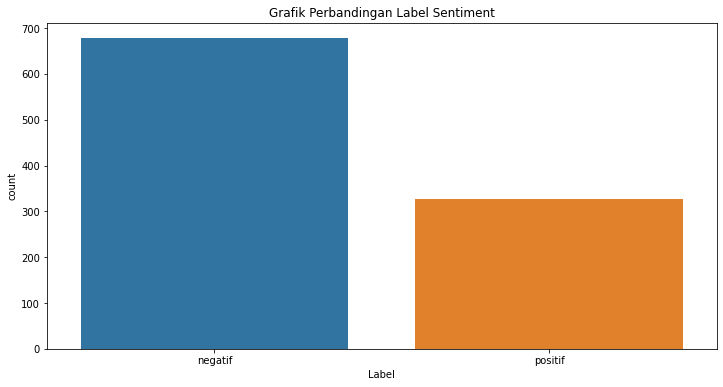

In [ ]:
# Menampilkan Jumlah Label Sentimen dalam bentuk Grafik BAR
plt.figure(figsize=(12,6))
sns.countplot(x='Label',data=data)
plt.savefig('label.png')
plt.title("Grafik Perbandingan Label Sentiment")
plt.show();

In [ ]:
# Menampilkan Jumlah Label Sentimen Dalam Bentuk Grafik Pie
fig = px.pie(data, names='Label', title = 'Persentase Label Sentiment')
plt.savefig('Grafik Pie label.png')
fig.show()

<Figure size 432x288 with 0 Axes>

#### Kategorisasi Data
Sebelum perhitungan TF-IDF, terlebih dahulu kita kategorikan data.
 - Kolom Label = Kategori
 - Kolom Stemming = String

In [ ]:
# Kategorisasi Data
data = data.astype({'Label' : 'category'})
data = data.astype({'Stemming' : 'string'})
data.dtypes

Label       category
Stemming      string
dtype: object

#### Perhitungan TF-IDF
Algoritma TF-IDF (Term Frequency – Inverse Document Frequency) adalah salah satu algoritma yang dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Contoh yang dibahas kali ini adalah mengenai penentuan urutan peringkat data berdasarkan query yang digunakan.
Inti utama dari algoritma ini adalah melakukan perhitungan nilai TF dan nilai IDF dari sebuah setiap kata kunci terhadap masing-masing dokumen. Nilai TF dihitung dengan rumus TF = jumlah frekuensi kata terpilih / jumlah kata dan nilai IDF dihitung dengan rumus IDF = log(jumlah dokumen / jumlah frekuensi kata terpilih). Selanjutnya adalah melakukan perkalian antara nilai TF dan IDF untuk mendapatkan jawaban akhir.

In [ ]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Perhitungan TF
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Stemming'].astype('U'))
#Perhitungan TF-IDF
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Stemming'].astype('U'))
print(text_tf)

  (0, 1541)	0.36909861971417585
  (0, 634)	0.4037155473659196
  (0, 1272)	0.38991224814111547
  (0, 1954)	0.06266376124107619
  (0, 284)	0.3608385837084492
  (0, 2659)	0.6439077371984819
  (1, 3552)	0.17610079519090568
  (1, 2043)	0.21225098041915696
  (1, 2049)	0.3938217657700441
  (1, 2308)	0.38435108737035734
  (1, 2493)	0.14844888274931442
  (1, 1753)	0.4324742403470437
  (1, 3232)	0.4514903665905675
  (1, 1657)	0.27305663150233966
  (1, 2050)	0.21623712017352184
  (1, 3785)	0.10396437375994184
  (1, 2423)	0.2731413851868279
  (1, 1954)	0.038325914841657
  (2, 1855)	0.3968492494041515
  (2, 95)	0.29395937495914404
  (2, 1277)	0.3206469377925937
  (2, 1912)	0.2860933579105178
  (2, 2764)	0.37456150202363664
  (2, 394)	0.276071443031564
  (2, 1783)	0.2983591904120788
  :	:
  (1003, 2486)	0.19785319363241824
  (1003, 1273)	0.19785319363241824
  (1003, 10)	0.19785319363241824
  (1003, 3779)	0.19785319363241824
  (1003, 2472)	0.19785319363241824
  (1003, 2526)	0.19785319363241824
  (100

In [ ]:
# Melihat Hasil Letak Sebuah Kata
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['aa',
 'aah',
 'aaj',
 'aarrgghh',
 'abang',
 'abcd',
 'abdala',
 'abdel',
 'abis',
 'abisin',
 'able',
 'abnormal',
 'aborsi',
 'about',
 'abshor',
 'abt',
 'abuse',
 'academy',
 'acara',
 'acasadodragao',
 'acau',
 'acc',
 'accommodate',
 'account',
 'aceh',
 'achilles',
 'actively',
 'acu',
 'ada',
 'adab',
 'adam',
 'adat',
 'adegan',
 'adek',
 'adik',
 'adil',
 'administrasi',
 'ado',
 'adriano',
 'adu',
 'aduh',
 'aduk',
 'advokasi',
 'advokat',
 'adzab',
 'after',
 'aga',
 'again',
 'agam',
 'agama',
 'agenda',
 'agung',
 'agus',
 'agustus',
 'ah',
 'ahahaa',
 'ahli',
 'ahligid',
 'ahmadiyah',
 'ahok',
 'ai',
 'aib',
 'aids',
 'ain',
 'aing',
 'aingg',
 'air',
 'aisa',
 'aish',
 'aisha',
 'aja',
 'ajadah',
 'ajak',
 'ajal',
 'ajar',
 'ajg',
 'ajgg',
 'aji',
 'akademika',
 'akademis',
 'akak',
 'akal',
 'akan',
 'akar',
 'akaun',
 'akhir',
 'akhirat',
 'akhlak',
 'akidah',
 'akrisnya',
 'akses',
 'aksi',
 'aktifin',
 'aktivis',
 'aku',
 'akun',
 'akunn',
 'akurat',
 'akwkawk',
 

In [ ]:
# Melihat hasil kalkulasi dari TF-IDF dalam sebuah kata
text_tf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Ubah Data TF-IDF ke dalam bentuk DataFrame
df = pd.DataFrame(text_tf.todense().T,
                  index=vectorizer.get_feature_names(),
                  columns=[f'D{i+1}' for i in range(len(data))])
df

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D995,D996,D997,D998,D999,D1000,D1001,D1002,D1003,D1004
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
aah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
aaj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
aarrgghh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
abang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zaman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
zi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
zina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.190764,0.0,0.0,0.0
zinah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


#### Split Validation
Split Validation adalah teknik validasi
yang membagi data menjadi dua bagian secara acak,
sebagian sebagai data training dan sebagian lainnya
sebagai data testing. Dengan menggunakan Split
Validation akan dilakukan percobaan training
berdasarkan split ratio yang telah ditentukan
sebelumnya, untuk kemudian sisa dari split ratio
data training akan dianggap sebagai data testing.
Data training adalah data yang akan dipakai dalam
melakukan pembelajaran sedangkan data testing
adalah data yang belum pernah dipakai sebagai
pembelajaran dan akan berfungsi sebagai data
pengujian kebenaran atau keakurasian hasil
pembelajaran. Namun disini kami split data training 0.9 (90%) dan data testing 0.1(10%)

Menentukan parameter random_state bertujuan untuk dapat memastikan bahwa
hasil pembagian dataset konsisten dan memberikan data yang sama setiap
kali model dijalankan . Jika tidak ditentukan , maka tiap kali melakukan
split , kita akan mendapatkan data train dan tes berbeda , yang juga akan
membuat akurasi model ML menjadi berbeda tiap kali di - run .

In [ ]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Label'], test_size=0.1, random_state=33)
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (903, 3822)
X_test_shape :  (101, 3822)
y_train_shape :  (903,)
y_test_shape :  (101,)


#### Parameter Turning Metode SVM
Hyperparameter  Tuning adalah  proses  pemilihan parameter terbaik  untuk  algoritma pembelajaran.   Salah   satu   untuk   menentukan   kombinasi Hyperparameter adalah   dengan menggunakan GridSearch. grid search adalah suatu cara untuk menemukan parameter terbaik yang digunakan untuk modeling dalam machin learning. Apabila kita memakai grid search ini kita bisa mencari mana hyperparameter terbaik yang hendak kita gunakan untuk modeling di suatu algoritma machine learning.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Membuat sebuah parameters dengan masing-masing jenis kernel, nilai C dan nilai Gamma
parameters = {
    'kernel' : ['rbf', 'poly', 'sigmoid'],
    'C' : [0.5, 1, 10, 100],
    'gamma' : [ 1, 0.1, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=42),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(random_state=42), n_jobs=6,
             param_grid={'C': [0.5, 1, 10, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

Dari hasil parameter turning dengan GridSearch. bahwa Kernel terbaik adalah "rbf", C terbaik adalah 1, dan nilai gamma terbaik adalah 1. sehingga menghasilkan score 0.69 (69%)

In [ ]:
# Menampilkan jenis Kernel, Nilai C dan Nilai Gamma terbaik (Best_Score)
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
  print(f'\t{param}: {best_params[param]}')

Best Score: 0.6965745856353592
Best Parameters:
	kernel: rbf
	C: 1
	gamma: 1


#### Evaluasi Model SVM

In [ ]:
from sklearn.metrics import classification_report
# Evaluasi hasil
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.71      0.99      0.83        71
     positif       0.67      0.07      0.12        30

    accuracy                           0.71       101
   macro avg       0.69      0.53      0.47       101
weighted avg       0.70      0.71      0.62       101



In [ ]:
# Hasil prediksi
print (y_pred)

['negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'positif' 'negatif'
 'negatif' 'positif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'positif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif' 'negatif'
 'nega

#### Confusion Matriks
Confusion matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui

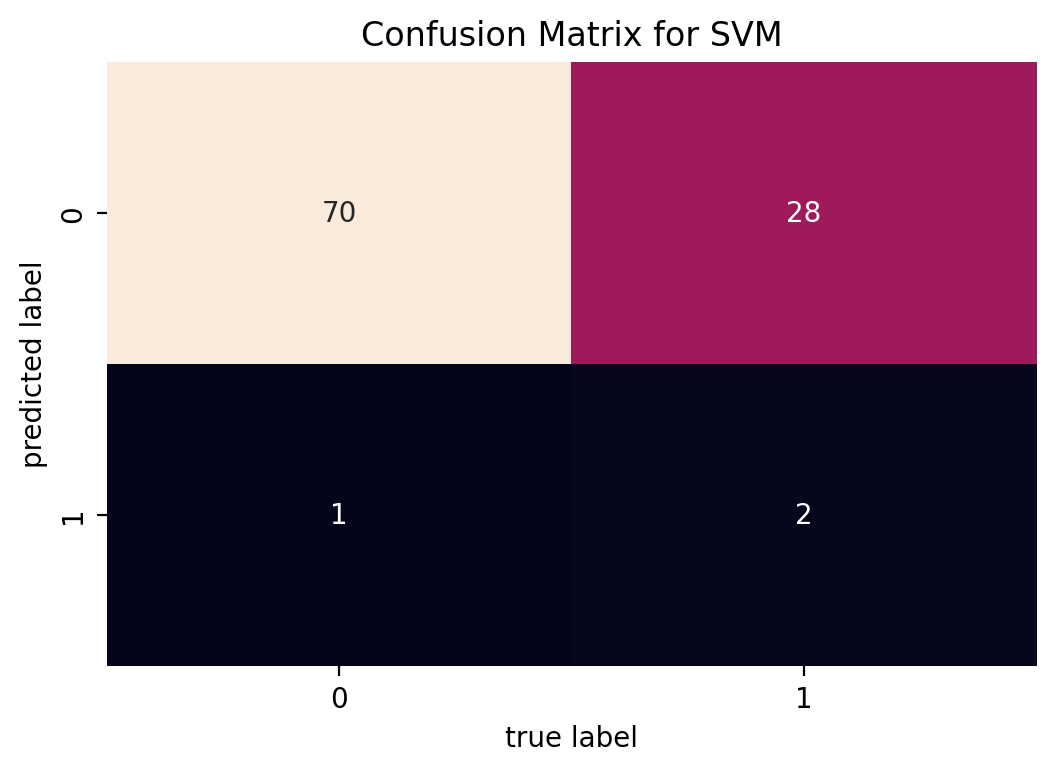

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=200)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for SVM')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#### Testing Model SVM

In [ ]:
# Input kalimat teks
kalimat_tes = ["temenmu lgbt coba ajak jalan jalan refreshing biar" ]

In [ ]:
#Loop untuk prediksi
for teks in kalimat_tes:
    arr_teks = []
    arr_teks.append(teks)
    vektor = vectorizer.transform(arr_teks)
    prediksi_label_SVM= grid_search.predict(vektor)

In [ ]:
# Print hasil prediksi
print("Hasil Prediksi :", prediksi_label_SVM)

Hasil Prediksi : ['negatif']


### TF_IDF Model 2

In [ ]:
max_features = 1004
databaru= data['Stemming'].astype(str)

#menambahkan ngram=(1,2) dst kalo mau pake pemisahan per 2 kata atau lebih
tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1,3), smooth_idf=False)
tfs = tfidf.fit_transform(databaru)
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = tfidf.fit_transform(databaru).toarray()

In [ ]:
IDF_vector

array([6.11998783, 5.96583715, 6.52545294, ..., 5.51385203, 5.60916221,
       6.52545294])

### Split Data

In [ ]:
X_t= tfidf_mat
Y_t= data['Label']

### SVM dengan Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
clasfc= SVC(kernel='rbf', C = 1, gamma= 1)
scores = cross_val_score(clasfc, X_t, Y_t, cv=10)

sc = pd.DataFrame(scores)
sc

,0
0,0.683168
1,0.712871
2,0.712871
3,0.663366
4,0.700000
5,0.650000
6,0.700000
7,0.710000
8,0.650000
9,0.660000


In [ ]:
from sklearn.model_selection import cross_val_predict
Y_pred = cross_val_predict(clasfc, X_t, Y_t, cv=10)
conf_mat = confusion_matrix(Y_t, Y_pred)

In [ ]:
Y_pred

array(['negatif', 'negatif', 'negatif', ..., 'positif', 'negatif',
       'negatif'], dtype=object)

### Confusion Matriks

In [ ]:
conf_mat

array([[618,  60],
       [257,  69]])

In [ ]:
TP = 35
TN = 655
FP = 23
FN = 291

### Accuracy

In [ ]:
accuracy= (TN+TP)/(TN+TP+FN+FP)
accuracy

0.6872509960159362

#### WordCloud
wordcloud adalah gambar yang menunjukkan daftar kata-kata yang digunakan dalam sebuah teks, umumnya semakin banyak kata yang digunakan semakin besar ukuran kata tersebut dalam gambar.

##### 1. WordCloud Sentiment Negatif

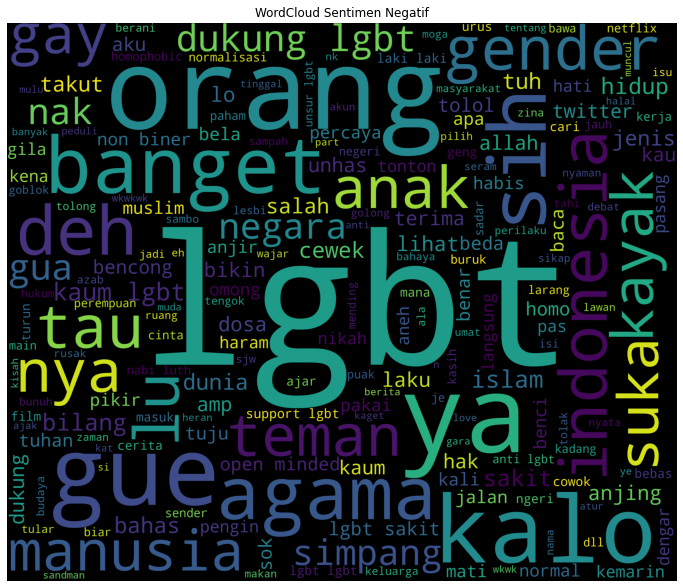

In [ ]:
# Import Library WordCloud
from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud
new_df=data[data['Label']=='negatif']
words = ' '.join(new_df['Stemming'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(figsize=(12, 12))
plt.title("WordCloud Sentimen Negatif")
plt.savefig('WordCloud Sentimen Negatif.pdf')
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

##### 2. WordCloud Sentiment Positif

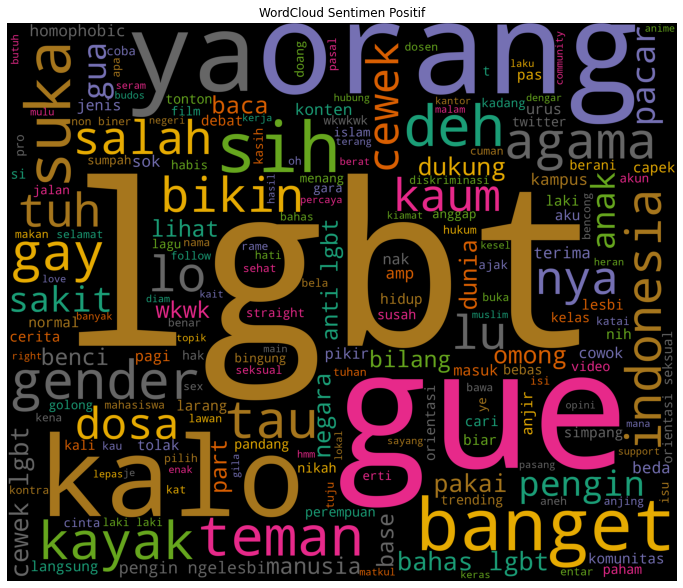

In [ ]:
# Import library Wordcloud
from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud
new_df_pos=data[data['Label']=='positif']
words_pos = ' '.join(new_df_pos['Stemming'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black', colormap = 'Dark2',
                      width=3000,
                      height=2500
                     ).generate(words_pos)
plt.figure(figsize=(12, 12))
plt.title("WordCloud Sentimen Positif")
plt.savefig('WordCloud Sentimen Positif.png', format="png")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 3. WordCloud ALL Sentiment

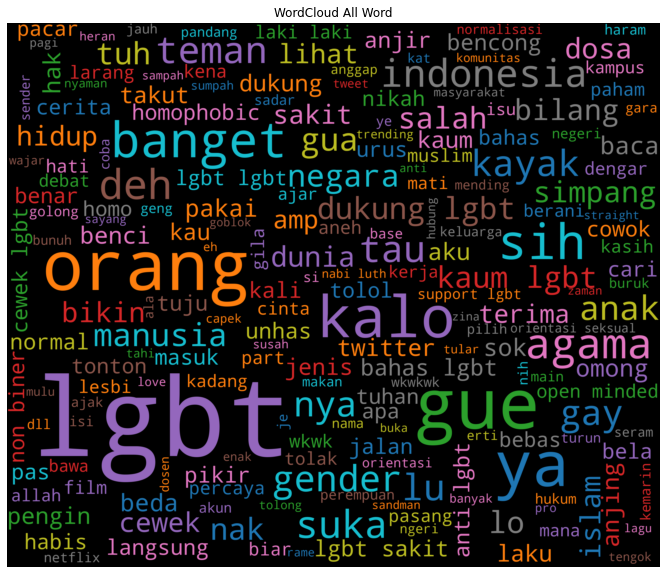

In [ ]:
allWords  = ' '.join( [str (twts) for twts in data['Stemming']])
wordCloud = WordCloud(width = 3000, height=2500, colormap = 'tab10', random_state=21, max_font_size=500).generate(allWords)
plt.figure(figsize=(12,10))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.title("WordCloud All Word")
plt.savefig('WordCloud All Word_1.png')
plt.axis('off')
plt.show()